# Kaggle Titanic Demo1.1 Logistic Regression

In [1]:
import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import math

from featureEngineering6 import feature_engineering
from plot_learning_curve import plot_learning_curve

Kaggle_train=pd.read_csv('data/train.csv', sep=',')
Kaggle_test=pd.read_csv('data/test.csv', sep=',')

df_train, df_test = feature_engineering(Kaggle_train, Kaggle_test)

feature= ['Pclass','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
          ]

# Acc: 0.886 +/- 0.017, F1: 0.842 +/- 0.025 # with max_depth = 4
# KS-0.81340 by max_depth=3

X, y = df_train[feature], Kaggle_train['Survived']

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 25 days


In [2]:
df_train.columns

Index([u'Age', u'HasAge', u'Pclass', u'Fare_', u'Fare_b', u'HasFamily',
       u'SibSp', u'Parch', u'FamilySize', u'FamilySurvived', u'FamilyDied',
       u'Age_s_adult', u'Age_s_elder', u'Age_s_young', u'Sex_female',
       u'Sex_male', u'Title_s_Master', u'Title_s_Miss', u'Title_s_Mr',
       u'Title_s_Mrs', u'Title_Age_s_adult', u'Title_Age_s_elder',
       u'Title_Age_s_young', u'Embarked__C', u'Embarked__Q', u'Embarked__S',
       u'Cabin_s_G', u'Cabin_s_M', u'Cabin_s_X'],
      dtype='object')

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.grid_search import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Train, Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        #('pca', KernelPCA(kernel='rbf')),
        ('clf', LogisticRegression(random_state=1, class_weight={0:0.5, 1:0.5}))
        #('clf', KNeighborsClassifier())
    ])


C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]


param_grid = [
    {
        'clf__C': C_range,
    }
]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=8,
                  #verbose=3,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print gs.best_score_

print gs.best_params_

0.884831460674
{'clf__C': 0.1}


In [6]:
clf = gs.best_estimator_

In [7]:
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [8]:
print( 'Training Acc: %.3f' % accuracy_score(clf.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(clf.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(clf.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(clf.predict(X_train), y_train))

Training Acc: 0.885
Training Precision: 0.814
Training Recall: 0.873
Training F1: 0.842


In [9]:
print( 'Test Acc: %.3f' % accuracy_score(clf.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(clf.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(clf.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(clf.predict(X_test), y_test))

Test Acc: 0.838
Test Precision: 0.726
Test Recall: 0.855
Test F1: 0.785


## Model evaluation

In [10]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation check for Acc: 0.871 +/- 0.021


In [11]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation check for F1: 0.823 +/- 0.032


In [12]:
from plot_learning_curve import plot_learning_curve

<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

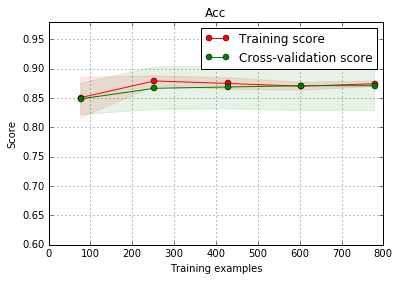

In [13]:
plot_learning_curve(clf, 'Acc', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

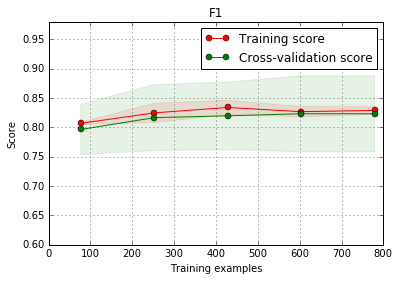

In [14]:
plot_learning_curve(clf, 'F1', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1')

## Prediction

In [15]:
clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [16]:
predictions = clf.predict(df_test[feature])

In [17]:
submission = pd.DataFrame({
        "PassengerId": Kaggle_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("Demo1.1-LR.csv", index=False)

### This gives Kaggle score: 0.76
